# 💡 O que é CatBoost

**CatBoost**, ou *Categorical Boosting*, é um algoritmo de aprendizado de máquina baseado em árvores de decisão que utiliza a técnica de **boosting por gradiente**. 🌲📈

Foi desenvolvido pela **Yandex**, uma das maiores empresas de tecnologia da Rússia 🇷🇺, com o objetivo de oferecer uma solução robusta para problemas envolvendo **dados categóricos**. 🧩

## 🌟 Principais características:

### 📊 Trabalha bem com dados categóricos:
O CatBoost processa colunas categóricas de forma nativa, sem a necessidade de pré-processamentos complexos como one-hot encoding.

### 🛡️ Redução de overfitting:
Utiliza técnicas avançadas para minimizar o problema de overfitting, como o método de ordenação e shrinkage.

### ⚡ Treinamento eficiente:
Garante velocidades competitivas e alto desempenho, especialmente em conjuntos de dados grandes.

### 🔍 Interpretação intuitiva:
Oferece ferramentas para interpretar os modelos, como importância das variáveis.

# 🧱 Etapas do CatBoost

## 👁️ Visão Geral

- ⚙️ Inicializa o modelo com uma predição básica.
- 🧩 Processa colunas categóricas usando o método de ordenação.
- 🌳 Ajusta árvores de decisão iterativamente usando gradiente descendente.
- 🎯 Controla o impacto de cada árvore com *shrinkage*.
- 🧠 Combina todas as árvores para formar o modelo final.

### 🔹 Inicializa o modelo com uma predição básica

O processo começa definindo uma predição inicial básica. Essa predição inicial é chamada de **base learner** e geralmente é o **valor médio (ou moda) do alvo (target)** no conjunto de treinamento.

📌 **Exemplo:**

- Para uma tarefa de **regressão**, a predição inicial pode ser a **média** dos valores de saída.
- Para **classificação binária**, a predição inicial pode ser o **logaritmo da razão de probabilidades**.

### 🧩 Processa colunas categóricas usando o método de ordenação

📌 Dados categóricos são comuns em problemas do mundo real, mas são desafiadores para modelos de *machine learning*.

🔧 O CatBoost lida com isso de forma eficiente por meio de uma técnica inovadora: **o método de ordenação**.

🔄 O CatBoost transforma as colunas categóricas em valores numéricos de forma dinâmica, com base nas **médias condicionais**.

Para evitar **vazamento de dados (data leakage)**, o CatBoost usa **ordenação temporal**:

- 🧮 Para cada valor categórico, calcula a **média condicional** dos alvos associados às instâncias **anteriores** na ordem do conjunto de dados.
- 🚫 Isso significa que, ao calcular a média para a linha *i*, o **valor do alvo dessa linha não é usado**.

📌 **Exemplo:**
Para uma coluna categórica “Produto”, o valor transformado pode ser a **média dos valores de saída (target)** para todas as instâncias anteriores onde “Produto” é igual.

✅ **Benefícios:**
- 🔒 Preserva a integridade dos dados durante o treinamento.
- 📉 Reduz o risco de overfitting.

### 🌳 Ajusta árvores de decisão iterativamente usando gradiente descendente

Durante o treinamento, o CatBoost cria árvores de decisão em cada iteração, mas com algumas diferenças importantes:

- 🔁 **Aprendizado sequencial**: As árvores são ajustadas sequencialmente, com cada árvore corrigindo os erros da anterior, usando a taxa de aprendizado.

- 📉 **Uso de Gradiente**: Em vez de ajustar diretamente para os resíduos, o algoritmo utiliza o **gradiente da função de perda** para determinar como ajustar a próxima árvore.

- 🎲 **Aleatoriedade Controlada**: O CatBoost introduz um grau de aleatoriedade durante a construção das árvores, o que ajuda a melhorar a **generalização**.

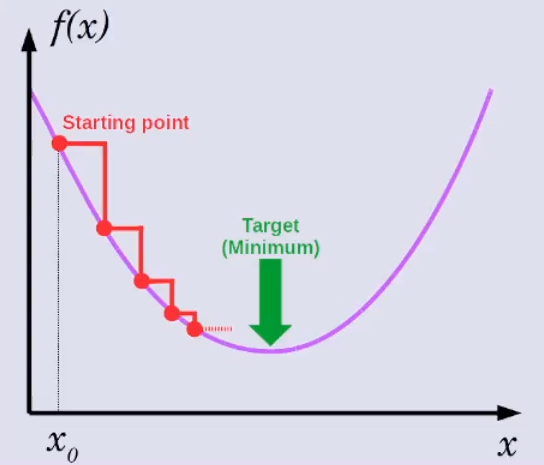

O CatBoost segue a lógica de **boosting por gradiente**, onde o modelo é treinado de forma **iterativa** para corrigir os erros cometidos por iterações anteriores.

🔄 **Passo 1**: Após a predição inicial, calcula-se a diferença entre as predições do modelo e os valores reais do alvo (os chamados **resíduos**).

🌱 **Passo 2**: Em cada iteração, o algoritmo ajusta uma nova árvore de decisão para modelar esses resíduos, ou seja, ele aprende a **minimizar a função de perda residual**.

🧠 **Passo 3**: O modelo final é uma **combinação ponderada** de todas as árvores criadas ao longo das iterações.

O **gradiente da função de perda** mede a **direção** e a **intensidade** com que devemos ajustar os parâmetros de um modelo para **minimizar a diferença entre as predições e os valores reais**.

🧭 Em outras palavras, ele indica **“como”** e **“quanto”** mudar os pesos do modelo para **melhorar sua performance**.

#### 📉 Função de perda (*loss function*):
Mede o erro entre as predições do modelo e os valores reais.  
**Exemplos comuns**:
- Erro Quadrático Médio (**MSE**) para regressão
- Log Loss (**Cross-Entropy**) para classificação

#### 🧭 Gradiente:
O gradiente é o **vetor das derivadas parciais** da função de perda em relação aos parâmetros do modelo.

🔼 Ele aponta na **direção de maior aumento** da função de perda.  
🔽 Para **minimizar a perda**, seguimos o gradiente na **direção oposta** (descida do gradiente).

### 🌿 Controla o impacto de cada árvore com *shrinkage*

No contexto do CatBoost, **shrinkage** é uma técnica que adapta o **peso das árvores** ao longo das iterações para melhorar a **generalização** do modelo.  
Essa adaptação pode ser vista como uma forma de **ajuste dinâmico** da contribuição de cada árvore.

🔧 **Função**:  
Recalibra os pesos das árvores depois que elas são treinadas, “**encolhendo**” suas contribuições para evitar **overfitting** ao conjunto de treinamento.

❓ **Por que é importante?**  
Ajuda a reduzir o impacto das árvores mais recentes e, em combinação com o **learning rate**, promove **estabilidade e generalização**.

O **learning rate** controla o impacto da contribuição de cada nova árvore no modelo final.  
Ele **escala as predições** adicionadas por cada árvore à combinação total, garantindo que as atualizações sejam feitas de forma **gradual**.

🔧 **Função**:  
Limita a **magnitude da contribuição** de cada nova árvore ao modelo combinado.

❓ **Por que é importante?**  
Um **learning rate pequeno** reduz o risco de **overfitting**, pois as árvores não fazem ajustes excessivos.  
⚠️ No entanto, isso pode exigir **mais iterações** para atingir uma boa performance.

#### 🧠 Diferença entre *learning rate* e *shrinkage*

- ⏱️ **Learning rate**:  
  Atua **antes** da nova árvore ser adicionada ao modelo, **reduzindo a contribuição** de cada árvore desde o início.

- 🔄 **Shrinkage**:  
  Ajusta os **pesos das árvores depois** que são criadas, **reavaliando o impacto** de suas contribuições ao longo das iterações.

### 🧩 Combina todas as árvores para formar o modelo final

Na etapa de **combinação** dos modelos no CatBoost, as árvores de decisão individuais — conhecidas como *weak learners* — são somadas iterativamente para formar um **modelo final mais robusto**, com base no hiperparâmetro `iterations`.

📈 **Para regressão**:  
O modelo **soma** as predições de cada árvore, resultando em um **valor contínuo**.

🧮 **Para classificação**:  
As predições das árvores são **combinadas** para fornecer uma **probabilidade por classe**, geralmente usando a função `softmax` para **normalizar as saídas**.

✅ Essa abordagem **evita overfitting**, pois as árvores trabalham em conjunto para capturar padrões complexos sem supervalorizar os dados de treinamento, promovendo **melhor generalização** para dados novos.

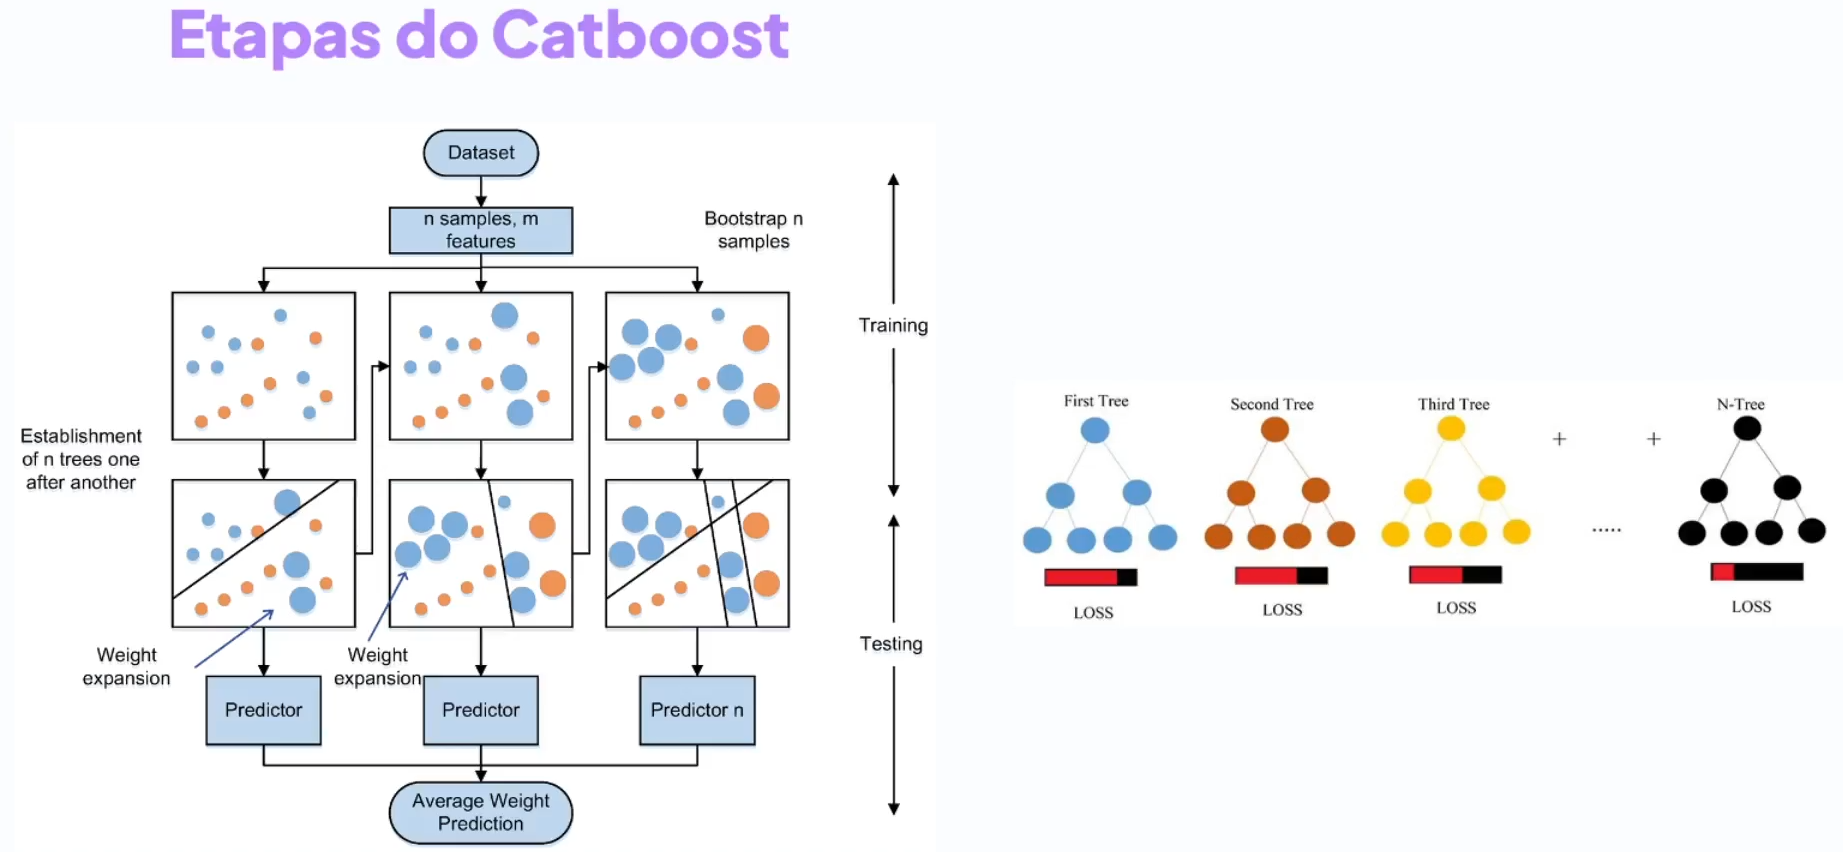

## ⚠️ Desafios e Limitações do CatBoost

Os principais desafios e limitações do CatBoost incluem:

- 💾 **Alto consumo de memória e tempo de treinamento**, especialmente com **grandes volumes de dados** e **muitas variáveis categóricas**.
- ⚖️ Dificuldade com **dados altamente desbalanceados**, exigindo ajustes finos.
- 🛠️ O **ajuste de hiperparâmetros** pode ser **demorado e computacionalmente exigente**.
- 🧮 Embora eficiente para **dados estruturados**, o CatBoost **não é ideal para dados não estruturados** como imagens ou texto.
- 🚫 Não suporta diretamente **classificação multilabel**.
- ⚙️ Requer **pré-processamento cuidadoso** para **variáveis numéricas faltantes ou extremas**.

## 🔧 Principais Hiperparâmetros

### 🌀 `iterations`

- 🌲 Define o número de árvores (*iterações*) a serem construídas no modelo.  
  Mais árvores podem melhorar a **precisão**, mas também aumentam o risco de **overfitting**.

- 🎯 A principal função é **controlar o tamanho do ensemble**.

- 📌 **Valor inicial sugerido**: `1000`

- 💡 **Justificativa**:  
  Um número maior de iterações pode melhorar a performance, mas deve ser ajustado com base no comportamento do modelo durante o treinamento, **balanceando precisão e tempo de execução**.

### ⚙️ `learning_rate`

- 📉 Determina a **taxa de aprendizado**, ou seja, o impacto de cada nova árvore na predição final.  
  Um valor menor leva a um treinamento mais gradual, mas pode exigir **mais iterações**.

- 🎯 A principal função é **controlar o tamanho do passo no gradiente descendente**.

- 📌 **Valor inicial sugerido**: `0.05 – 0.1`

- 💡 **Justificativa**:  
  Valores menores **melhoram a generalização**, mas aumentam o **tempo de treinamento**.  
  Geralmente, combina-se com o aumento de `iterations` para manter o **equilíbrio entre precisão e eficiência**.

### 🌲 `depth`

- 📏 Define a **profundidade máxima** das árvores de decisão.  
  Árvores mais profundas podem capturar **padrões complexos**, mas também aumentam o risco de **overfitting**.

- 🎯 A principal função é **controlar a complexidade** das árvores.

- 📌 **Valor inicial sugerido**: `6 – 10`

- 💡 **Justificativa**:  
  Aprofundar as árvores permite **capturar mais detalhes** dos dados,  
  mas valores maiores **aumentam o risco de sobreajuste**.

### 🧮 `l2_leaf_reg`

- 📏 É o parâmetro de **regularização L2** (também conhecido como **penalização de Ridge**), aplicado para **controlar a complexidade das árvores**, prevenindo **overfitting**.

- 🎯 A principal função é **regularizar o modelo**.

- 📌 **Valor inicial sugerido**: `3 – 10`

- 💡 **Justificativa**:  
  Um valor maior **reduz a complexidade** das árvores e ajuda a **controlar overfitting**,  
  especialmente em modelos com **muitas iterações** ou **profundidade elevada**.

### 🏷️ `cat_features`

- 🔠 Define as **colunas categóricas** do conjunto de dados.  
  O CatBoost lida com variáveis categóricas **de forma nativa**, sem necessidade de transformações como *one-hot encoding*.

- 🎯 A principal função é **indicar quais colunas são categóricas**.

- 📌 **Valor inicial sugerido**: Lista de colunas categóricas do seu *dataset*.

- 💡 **Justificativa**:  
  É essencial para que o CatBoost **trate corretamente as variáveis categóricas**, **sem perda de informação**.

### 🎲 `random_strength`

- 🔄 Controla a **aleatoriedade nas divisões** de cada árvore, ajudando a **reduzir o overfitting**.  
  Aumentar esse valor pode tornar o modelo mais **generalizável**.

- 🎯 A principal função é **controlar a força da aleatoriedade** durante a construção das árvores.

- 📌 **Valor inicial sugerido**: `1 – 10`

- 💡 **Justificativa**:  
  Maior aleatoriedade tende a **melhorar a generalização**,  
  mas deve ser **ajustada cuidadosamente para evitar underfitting**.

### ⚙️ `loss_function`

- 🎯 Especifica a **função de perda** que será otimizada durante o treinamento,  
  como `Logloss` para classificação ou `RMSE` para regressão.

- 🧭 A principal função é **definir o objetivo do treinamento**, alinhando-o ao tipo de problema.

- 📌 **Valor inicial sugerido**: `"Logloss"` (para problemas de classificação)

- 💡 **Justificativa**:  
  A escolha da função de perda é **crítica**, pois ela direciona o modelo para o tipo de predição desejada:  
  seja para **maximizar a acurácia em classificação** ou **minimizar o erro em regressão**.

## 🏷️ Classificação Multilabel

**Classificação Multilabel** é um tipo de problema em que uma instância pode pertencer a **múltiplas classes simultaneamente**,  
ao contrário de problemas tradicionais (*single label*), onde cada instância pertence a uma única classe.

### 📌 Exemplos

- **Processamento de texto**:  
  - 📧 Um e-mail pode ser classificado como **“Spam”** e **“Marketing”**.

- **Análise de imagens**:  
  - 🖼️ Uma imagem pode conter **“carro”**, **“pessoa”** e **“bicicleta”**.

### ❓ Qual a diferença entre classificação **multiclasse** e **multilabel**?

---

### 🧩 Classificação **Multiclasse**

- 📌 Cada amostra pertence a **EXATAMENTE UMA** classe  
- 🚫 As classes são **mutuamente exclusivas**  
- 📚 **Exemplo**:  
  - Classificação de animais (um animal só pode ser **gato OU cachorro OU pássaro**)

---

### 🧷 Classificação **Multilabel**

- 📌 Cada amostra pode pertencer a **VÁRIAS classes simultaneamente**  
- ✅ As classes **não são mutuamente exclusivas**  
- 🎬 **Exemplo**:  
  - Gêneros de um filme (um filme pode ser **ação E comédia E romance**)

### 🤔 Como abordar problemas **Multilabel** com **CatBoost**?

- 🔀 Divida o problema em **múltiplas classificações binárias**  
  (uma para cada classe).

- 🧠 Utilize técnicas como **One-vs-All** para **transformar o problema** em tarefas binárias.

### ❓ O que é a abordagem **One-vs-All**?

A abordagem **One-vs-All** (também chamada de **One-vs-Rest**) transforma um problema de múltiplas classes em **vários problemas de classificação binária** mais simples.

👉 Em problemas **multilabel**, **cada classificador decide independentemente** se aquele rótulo se aplica ou não.

### 🎬 Exemplo: Classificação de filmes por gênero

- ✅ Um classificador decide: "**é ação** ou **não é ação**"
- ✅ Outro decide: "**é comédia** ou **não é comédia**"
- ✅ Outro decide: "**é drama** ou **não é drama**"

Como um filme pode ter **múltiplos gêneros**, cada classificador toma sua decisão **de forma independente**.

📌 Um mesmo filme pode receber `"sim"` de **vários classificadores** — por exemplo, ser classificado como **ação E comédia**.

📣 É como ter vários críticos especializados, cada um focado em identificar um único gênero — e todos podem dizer "sim" para o mesmo filme.